In [2]:
#Package import
import numpy.random as rn
import matplotlib.pyplot as plt
import numpy as np

# Exploring basic autoregressive stuff

Here we'll explore some of the basic properties of autoregression that we went over in last week's lecture. First, let's remind ourselves of the basic AR(1) structure:

$x_{t+1} = \mu + \rho x_t + \varepsilon_{t+1}$

That is, tomorrow's value of $x$ depends on 

1. The mean value $\mu$
2. Today's value of $x$ ($x_t$)
3. and an error term representing any unknown information that gets revealed tomorrow ($\varepsilon_{t+1}$). The error term is defined to be distributed as white noise with a mean of zero. A normal distribution with $\mu = 0$ and constant $\sigma^2$ fits the definition.

### Convergent series

Let's start by setting up some basic parameter values. I'll set the mean to zero for now just to make things simple. 

Setting the initial value $x_0 = 1$ indicates an information shock at time zero. The series will attempt to "forget" that information as it goes along and revert to its long-term mean value. The thing that makes this work is the autoregressive coefficient. Since it's < 1, every period depends less and less on the value of the series in period before it, and more and more on the mean term and the noise term. Let's see how long it takes the series to incorporate this information.

In [37]:
#Set initial values
mu = 0 #mean
rho = 0.9 #autoregressive constant
x_0 = 1 #initial value (shock)

t_array = np.arange(31) #array of time steps for plotting

Here I'll generate two autoregressive series. One with a noise term set to zero. This will give us an idea of the expected trajectory of the process after a shock in period 0. Secondly, I'll generate a series with some noise closer to what we might expect with real data. I'm saving the values to arrays with `.append()` so this will actually be a time series.

Try to see how we build the response. We start the array with the initial value of x ($x_0$), the for loop generates an error term for that period, looks at the value of the array at position `i` and generates the next value by plugging it into the AR(1) process, then appends and proceeds to the next step. 

In [38]:
#Generate impulse response with no noise
x_clean = []
x_clean.append(x_0)

for i in range(30):
    err = 0
    x_t1 = mu + rho*x_clean[i] + err #AR(1) process
    x_clean.append(x_t1)

In [39]:
#Generate impulse response with errors
x_noisy = []
x_noisy.append(x_0)

for i in range(30):
    err = rn.normal(0, 0.05) #error process
    x_t1 = mu + rho*x_noisy[i] + err
    x_noisy.append(x_t1)

Now we can plot the data. As you can see the noisy data follows the pure (no noise) data quite poorly. Both series decline gradually until they reach 0 (the overall mean for the AR model).

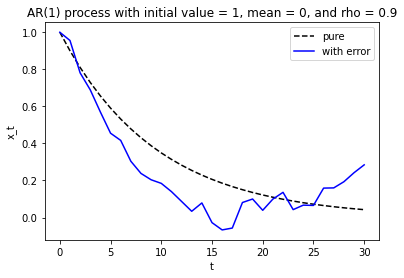

In [40]:
plt.plot(t_array, x_clean, color = 'black', linestyle = 'dashed')
plt.plot(t_array, x_noisy, color = 'blue')
plt.xlabel("t")
plt.ylabel("x_t")
plt.title(f"AR(1) process with initial value = {x_0}, mean = {mu}, and rho = {rho}")
plt.legend(['pure', 'with error'])

As you can see in this case, the initial shock at the beginning of the series affects the series for a long time (i.e. the series "remembers" this shock and takes a long time to regress back to its mean value). You can also see the blue noisy process doesn't necessarily follow the dashed noise-less process very well. This is because the individual errors at each step also take a long time for the series to forget, so we can see the series diverging from its expected value pretty badly at times.

If a series has a mean reverting tendency, we call it a **convergent series**

Now let's play with things! First, let's define a function to plot these out for us and make our lives a little easier. 

In [23]:
def generate_ar_model(rho, mu = 0, x_0 = 1, var = 0.05):
    #Generate impulse response with no noise
    x_clean = []
    x_clean.append(x_0)

    for i in range(30):
        err = 0
        x_t1 = mu + rho*x_clean[i] + err #AR(1) process
        x_clean.append(x_t1)

    #Generate impulse response with errors
    x_noisy = []
    x_noisy.append(x_0)

    for i in range(30):
        err = rn.normal(0, var) #error process
        x_t1 = mu + rho*x_noisy[i] + err
        x_noisy.append(x_t1)
        
    return x_clean, x_noisy
        
def plot_ar_model(x_clean, x_noisy, rho, mu = 0, x_0 = 1):
        
    plt.plot(t_array, x_clean, color = 'black', linestyle = 'dashed')
    plt.plot(t_array, x_noisy, color = 'blue')
    plt.xlabel("t")
    plt.ylabel("x_t")
    plt.title(f"AR(1) process with initial value = {x_0}, mean = {mu}, and rho = {rho}")
    plt.legend(['pure', 'with error'])

Let's make the autoregressive coefficient really small and see what happens. Here we'll set $\rho = 0.4$

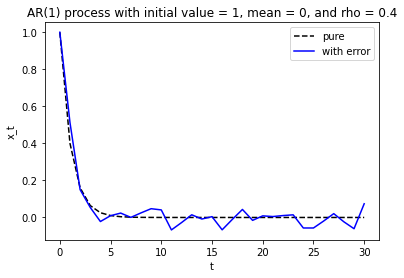

In [30]:
rho = 0.4

x_clean, x_noisy = generate_ar_model(rho = rho)
plot_ar_model(x_clean, x_noisy, rho = rho, mu = 0, x_0 = 1)

As we can see here the effect of making the autoregressive coefficient really small means that errors are more rapidly forgotten by the series x. The initial shock of 1 is much more quickly damped out compared to the case where $\rho = 0.9$. This is because when $\rho$ is near zero, then the value of the series today is less sensitive to the value of the series yesterday, so unexpected shocks to the time series don't matter as much! The series quickly forgets the shock, and returns to the mean value.

You can also see the noisy process follows the noise-less process much more closely in this case. This is because the individual errors at each step are also forgotten about much more quickly along with the initial shock.

In the case where $\rho \rightarrow 0$ you can see the series approaches perfect memorylessness behavior where the shock in the first period is immediately forgotten about, and we immediately return to a process that oscillates around 0.

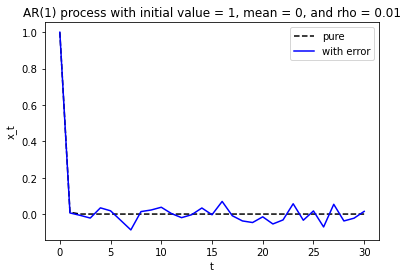

In [32]:
rho = 0.01

x_clean, x_noisy = generate_ar_model(rho = rho)
plot_ar_model(x_clean, x_noisy, rho = rho, mu = 0, x_0 = 1)

## The random walk

Now let's get really crazy. Let's see what happens when we set $\rho = 1$

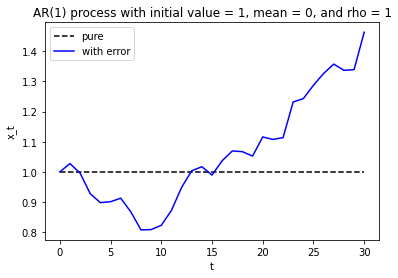

In [42]:
rho = 1

x_clean, x_noisy = generate_ar_model(rho = rho)
plot_ar_model(x_clean, x_noisy, rho = rho, mu = 0, x_0 = 1)

Wow! As you can see here, the process does not appear to really care about the mean value at all! It doesn't even attempt to regress back to the mean value of 0, nor does it oscillate around the value of the initial shock either. Why did this happen?

Well when $\rho = 1$, notice the effect of each individual shock *never* dies out! The series perfectly and immediately remembers every shock. What we get in this case is a wandering series that never returns to any previous value called a "random walk". Notice too if we generate a bunch of these, we will always get a different series:

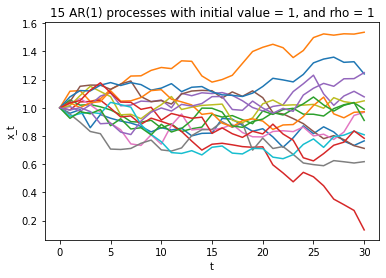

In [59]:
def generate_random_walk_plots(num_series=10, var = 0.05):

    random_walks = []

    for i in range(num_series):
        x_clean, x_noisy = generate_ar_model(rho = 1, var = var)
        random_walks.append(x_noisy)

    for j in range(len(random_walks)):
        plt.plot(t_array, random_walks[j])
        plt.xlabel("t")
        plt.ylabel("x_t")
        plt.title(f"{num_series} AR(1) processes with initial value = {x_0}, and rho = {rho}")

generate_random_walk_plots(15)

If we increase the noise factor in our error process, notice the random walks start to fan out more. Try to think about why this is.

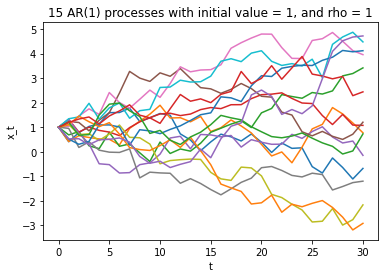

In [60]:
generate_random_walk_plots(15, var = 0.4)

Notice, even though an individual series doesn't regress back to a mean value, we can still form an expectation. Notice the random walks all symmetrically arrange themselves around the starting value - 1. This confirms our math from earlier in the course, where we saw the expectation of a random walk is just whatever the latest value in the series is. 

### Divergent series

A random walk is an example of a divergent series. There isn't any mean reverting tendency, so the series will never converge to some expected value. 

Another example is when $\rho$ is bigger than 1. Let's see what happens in this case:

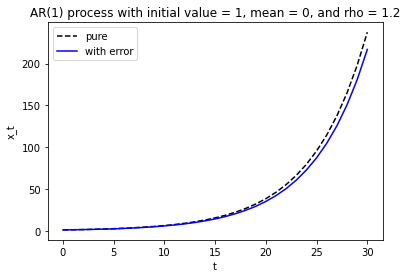

In [62]:
rho = 1.2

x_clean, x_noisy = generate_ar_model(rho = rho)
plot_ar_model(x_clean, x_noisy, rho = rho, mu = 0, x_0 = 1)

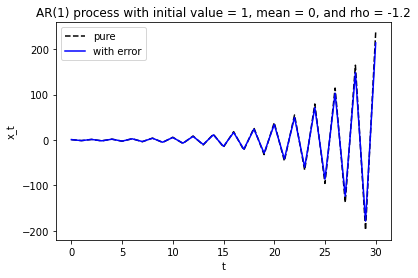

In [63]:
rho = -1.2

x_clean, x_noisy = generate_ar_model(rho = rho)
plot_ar_model(x_clean, x_noisy, rho = rho, mu = 0, x_0 = 1)

You can see in these cases why we generally impose the restriction that $\rho <= 1$. In cases where $\rho > 1$ the series diverges and explodes away from its mean. In the first case the series has explosive growth. In the second, the negative causes us to alternate between positive and negative values, with similarly explosive behavior.

### Assignment

Here we developed an autoregressive model that depended on a single lag of the dependent variable. This is known as an autoregressive model of order 1 (or an AR(1) model). An AR(2) model would depend on two lags of the dependent variable, so that

$$x_{t+1} = \mu + \rho_1 x_t + \rho_2 x_{t-1} + \varepsilon_{t+1}$$

Try to produce the same charts you saw above. What restrictions for $\rho_1$ and $\rho_2$ are necessary for stability?